In [1]:
import ps_utils
import os
from skimage.io import imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = r'C:\Users\tibor\Documents\semester 1\Vision and Image processing\assignments\assignment 3\DataAndCodeAssignment3'
filename ='Beethoven'

In [3]:
I_beet, mask_beet, S_beet = ps_utils.read_data_file(os.path.join(path,filename))

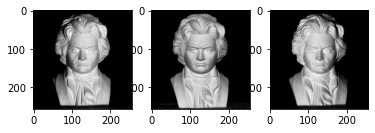

In [4]:
# show the 3 available images of beethoven
fig, axes = plt.subplots(1, 3)
ax = axes.ravel()

# images = data.stereo_motorcycle()
ax[0].imshow(I_beet[:,:,0],cmap = 'Greys_r')
ax[1].imshow(I_beet[:,:,1],cmap = 'Greys_r')
ax[2].imshow(I_beet[:,:,2],cmap = 'Greys_r')


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


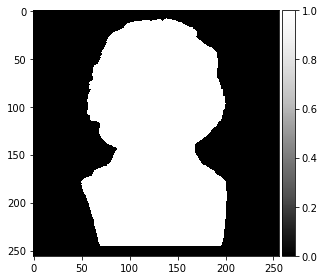

In [5]:
# show what is masked
imshow(mask_beet, cmap = 'Greys_r')

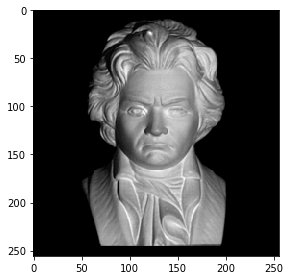

In [6]:
# show beethoven clipped with the mask
imshow(mask_beet * I_beet[:,:,0])

In [7]:
mask_beet_new = 1 - mask_beet #take 1-mask so that the face is shown and not the background

In [8]:
J = np.ndarray((3,mask_beet.sum())) #create nd array
for i in range(I_beet.shape[2]):
    masked_I_beet = np.ma.masked_array(I_beet[:,:,i], mask=mask_beet_new)
    compressed_I_beet = masked_I_beet.compressed()
    J[i] = compressed_I_beet


In [9]:
J.shape

(3, 28898)

In [10]:
# get M= S^-1 J
S_beet_inv = np.linalg.inv(S_beet)
M = S_beet_inv @J

In [11]:
# With it(M), extract the albedo
# within the mask, display it as a 2D image.

In [12]:
# calculate albedo
norm_M_beet = np.linalg.norm(M, axis = 0)
albedo_beet = norm_M_beet

In [13]:
# convert back to image
# inspired by https://stackoverflow.com/questions/38855058/inverting-the-numpy-ma-compressed-operation
albedo_image_beet = np.ndarray(mask_beet.shape)
np.place(albedo_image_beet,masked_I_beet.mask,0)
np.place(albedo_image_beet,~masked_I_beet.mask,albedo_beet)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


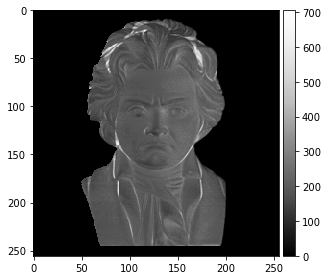

In [14]:
# display the albedo 
imshow(albedo_image_beet,cmap = 'Greys_r')

In [15]:
# CALCULATE normal
normal = (1/albedo_beet)*M
n1,n2,n3 = normal #unpack to seperate variables

In [16]:
# convert back to 256x256 array
# inspired by https://stackoverflow.com/questions/38855058/inverting-the-numpy-ma-compressed-operation
norm1 = np.ndarray(mask_beet.shape)
np.place(norm1,masked_I_beet.mask,0)
np.place(norm1,~masked_I_beet.mask,n1)


In [17]:
norm2 = np.ndarray(mask_beet.shape)
np.place(norm2,masked_I_beet.mask,0)
np.place(norm2,~masked_I_beet.mask,n2)

In [18]:
norm3 = np.ndarray(mask_beet.shape)
np.place(norm3,masked_I_beet.mask,0)
np.place(norm3,~masked_I_beet.mask,n3)

In [19]:
z_beet = ps_utils.simchony_integrate(norm1,norm2,norm3, mask_beet)

C:\Users\tibor\Documents\semester 1\Vision and Image processing\assignments\assignment 3\ps_utils.py:519: RuntimeWarning: invalid value encountered in true_divide
  p = -n2/n3
C:\Users\tibor\Documents\semester 1\Vision and Image processing\assignments\assignment 3\ps_utils.py:520: RuntimeWarning: invalid value encountered in true_divide
  q = -n1/n3
C:\Users\tibor\Documents\semester 1\Vision and Image processing\assignments\assignment 3\ps_utils.py:550: RuntimeWarning: divide by zero encountered in true_divide
  Z = fs/denum


In [20]:
ps_utils.display_surface(z_beet, albedo=None)